# Import Packages

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer

# importing library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration

In [3]:
feature=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
          "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells",
          "num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
          "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count", 
          "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
          "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]

In [4]:
train='nsl-kdd/KDDTrain+.txt'
test='nsl-kdd/KDDTest+.txt'
test21='nsl-kdd/KDDTest-21.txt'
train_data=pd.read_csv(train,names=feature)

In [5]:
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


# Data Processing

In [6]:
# remove attribute 'difficulty_level'
train_data.drop(['difficulty'],axis=1,inplace=True)
train_data.shape

(125973, 42)

In [7]:
# number of attack labels 
train_data['label'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

In [8]:
def change_label(df):
  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)      
  df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)m

In [9]:
change_label(train_data)

In [10]:
train_data = train_data[0:20000]

In [11]:
# distribution of attack classes
train_data.label.value_counts()

normal    10693
Dos        7346
Probe      1791
R2L         159
U2R          11
Name: label, dtype: int64

In [12]:
data = train_data.copy()

In [13]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
data['protocol_type']= label_encoder.fit_transform(data['protocol_type'])
data['service']= label_encoder.fit_transform(data['service'])
data['flag']= label_encoder.fit_transform(data['flag'])
data['label']= label_encoder.fit_transform(data['label'])

data['protocol_type'].unique()
data['service'].unique()
data['flag'].unique()
data['label'].unique()

array([4, 0, 2, 1, 3], dtype=int64)

In [14]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,4
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,4
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,4
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4


In [15]:
X = data.drop(["label"],axis =1)
y = data["label"]

# Feature Selection

In [16]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_classif

In [17]:
selector = SelectPercentile(mutual_info_classif, percentile=35)
X_reduced = selector.fit_transform(X, y)
X_reduced.shape

(20000, 14)

In [18]:
cols = selector.get_support(indices=True)
selected_columns = X.iloc[:,cols].columns.tolist()
selected_columns

['service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'count',
 'serror_rate',
 'srv_serror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate']

In [19]:
df = data[['service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'count',
 'serror_rate',
 'srv_serror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
              'label']]
df.to_csv('processed.csv')

# Split Dataset

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size = 0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16000, 14), (16000,), (4000, 14), (4000,))

In [38]:
ML_Model = []
accuracy = []
f1score = []
recall = []
precision = []


#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))    
    f1score.append(round(d, 3))

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# SVM

In [43]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.svm import SVC

# defining parameter range
param_grid = {'C': [0.1, 1], 
              'gamma': [1, 0.1],
              'kernel': ['rbf']} 

svm = GridSearchCV(SVC(probability=True), param_grid, refit = True, verbose = 3, cv=StratifiedKFold(10))
svm.fit(X_train, y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV 1/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.564 total time= 2.5min
[CV 2/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.562 total time= 2.7min
[CV 3/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.563 total time= 2.5min
[CV 4/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.564 total time= 2.5min
[CV 5/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.562 total time= 2.5min
[CV 6/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.560 total time= 2.5min
[CV 7/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.558 total time= 2.5min
[CV 8/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.556 total time= 2.5min
[CV 9/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.565 total time= 2.5min
[CV 10/10] END ......C=0.1, gamma=1, kernel=rbf;, score=0.561 total time= 2.7min
[CV 1/10] END .....C=0.1, gamma=0.1, kernel=rbf;, score=0.621 total time= 2.5min
[CV 2/10] END .....C=0.1, gamma=0.1, kernel=rbf;

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1], 'gamma': [1, 0.1], 'kernel': ['rbf']},
             verbose=3)

In [44]:
y_pred = svm.predict(X_test)

svc_acc = accuracy_score(y_pred, y_test)
svc_prec = precision_score(y_pred, y_test,average='weighted')
svc_rec = recall_score(y_pred, y_test,average='weighted')
svc_f1 = f1_score(y_pred, y_test,average='weighted')

In [45]:
storeResults('SVM',svc_acc,svc_prec,svc_rec,svc_f1)

# Stacking Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier

estimators = [('rf', RandomForestClassifier(n_estimators=10)),('mlp', MLPClassifier(random_state=1, max_iter=30))]

clf = StackingClassifier(estimators=estimators, final_estimator=LGBMClassifier(n_estimators=10))


clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

stac_acc = accuracy_score(y_pred, y_test)
stac_prec = precision_score(y_pred, y_test,average='weighted')
stac_rec = recall_score(y_pred, y_test,average='weighted')
stac_f1 = f1_score(y_pred, y_test,average='weighted')

In [93]:
storeResults('Stacking Classifier',stac_acc,stac_prec,stac_rec,stac_f1)

# Voting Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
clf1 = AdaBoostClassifier(n_estimators=100, random_state=0)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)

eclf1 = VotingClassifier(estimators=[('ad', clf1), ('rf', clf2)], voting='soft')
eclf1.fit(X_train, y_train)
y_pred = eclf1.predict(X_test)

vot_acc = accuracy_score(y_pred, y_test)
vot_prec = precision_score(y_pred, y_test,average='weighted')
vot_rec = recall_score(y_pred, y_test,average='weighted')
vot_f1 = f1_score(y_pred, y_test,average='weighted')



In [94]:
storeResults('Voting Classifier',vot_acc,vot_prec,vot_rec,vot_f1)

# PCA - SVM

In [50]:
from sklearn.decomposition import PCA

X_new = PCA(n_components=10).fit_transform(X)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2)

In [52]:
svm1 = GridSearchCV(SVC(probability=True), param_grid, refit = True, verbose = 3, cv=StratifiedKFold(10))
svm1.fit(X_train, y_train)

y_pred = svm1.predict(X_test)

svc1_acc = accuracy_score(y_pred, y_test)
svc1_prec = precision_score(y_pred, y_test,average='weighted')
svc1_rec = recall_score(y_pred, y_test,average='weighted')
svc1_f1 = f1_score(y_pred, y_test,average='weighted')

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV 1/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.543 total time= 2.9min
[CV 2/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.538 total time= 2.8min
[CV 3/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.541 total time= 2.7min
[CV 4/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.542 total time= 2.9min
[CV 5/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.540 total time= 2.8min
[CV 6/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.541 total time= 2.7min
[CV 7/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.541 total time= 2.8min
[CV 8/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.541 total time= 2.7min
[CV 9/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.539 total time= 2.7min
[CV 10/10] END ......C=0.1, gamma=1, kernel=rbf;, score=0.545 total time= 2.7min
[CV 1/10] END .....C=0.1, gamma=0.1, kernel=rbf;, score=0.547 total time= 2.6min
[CV 2/10] END .....C=0.1, gamma=0.1, kernel=rbf;

In [53]:
storeResults('SVM-PCA',svc1_acc,svc1_prec,svc1_rec,svc1_f1)

# Deep AutoEncoder SVM

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2)

import matplotlib.pyplot as plt
n_train = np.array(X_train)
n_test = np.array(X_test)

In [55]:
from keras.layers import Input, Dense
from keras.models import Model
import tensorflow as tf

input_dim = n_train.shape[1]
feature_dim = [25, 20, 15, 10]
print(input_dim)
inputs = Input(shape=(input_dim,))
encoded = inputs
encoded = Dense(feature_dim[0], kernel_initializer="uniform")(encoded)
encoded = Dense(feature_dim[1], kernel_initializer="uniform")(encoded)
encoded = Dense(feature_dim[2], kernel_initializer="uniform")(encoded)
encoded = Dense(feature_dim[3], kernel_initializer="uniform")(encoded)

decoded = encoded
decoded = Dense(feature_dim[2], kernel_initializer="uniform")(decoded)
decoded = Dense(feature_dim[1], kernel_initializer="uniform")(decoded)
decoded = Dense(feature_dim[0], kernel_initializer="uniform")(decoded)
decoded = Dense(input_dim, kernel_initializer="uniform")(decoded)

10


In [56]:
dnn = Model(inputs, decoded)
dnn.compile(optimizer='adadelta', loss='mse')

dnn.fit(n_train, n_train,
                verbose=0,
                epochs=150,
                batch_size=100,
                shuffle=True,
                validation_data=(n_test, n_test))

predict_vals = dnn.predict(n_train)

In [62]:
from keras.models import Sequential

featuremodel = Sequential()
featuremodel.add(Dense(feature_dim[0], input_shape=(input_dim,), weights=dnn.layers[1].get_weights()))
featuremodel.add(Dense(feature_dim[1], weights=dnn.layers[2].get_weights()))
featuremodel.add(Dense(feature_dim[2], weights=dnn.layers[3].get_weights()))
featuremodel.add(Dense(feature_dim[3], weights=dnn.layers[4].get_weights()))

featuremodel.compile(optimizer='adadelta', loss='mse')

In [83]:
# classic svm with deep autoencoder
from sklearn.svm import LinearSVC
deepmodel = LinearSVC(penalty="l1", loss="squared_hinge", dual=False)
deepmodel.fit(featuremodel.predict(n_train),y_train)
deepprediction=deepmodel.predict(featuremodel.predict(n_test))
print("Accuracy d-dnn-svm: %s" % "{0:.3%}".format(accuracy_score(deepprediction, y_test)))

Accuracy d-dnn-svm: 53.150%


In [66]:
dl_acc = accuracy_score(deepprediction, y_test)
dl_prec = precision_score(deepprediction, y_test,average='weighted')
dl_rec = recall_score(deepprediction, y_test,average='weighted')
dl_f1 = f1_score(deepprediction, y_test,average='weighted')

storeResults('Deep Autoencoder - SVM L1',dl_acc,dl_prec,dl_rec,dl_f1)

# DAE SVM L2

In [84]:
deepmodel = LinearSVC(penalty="l2", loss="squared_hinge", dual=True)
deepmodel.fit(featuremodel.predict(n_train),y_train)
deepprediction=deepmodel.predict(featuremodel.predict(n_test))

In [85]:
dl_acc = accuracy_score(deepprediction, y_test)
dl_prec = precision_score(deepprediction, y_test,average='weighted')
dl_rec = recall_score(deepprediction, y_test,average='weighted')
dl_f1 = f1_score(deepprediction, y_test,average='weighted')

storeResults('Deep Autoencoder - SVM L2',dl_acc,dl_prec,dl_rec,dl_f1)

# Comparison

In [95]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'Precision': precision,
                        'Recall'   : recall,
                        'F1-Score': f1score
                      })

In [96]:
result

,ML Model,Accuracy,Precision,Recall,F1-Score
0,SVM,0.921,0.934,0.921,0.923
1,SVM-PCA,0.842,0.900,0.842,0.852
2,Deep Autoencoder - SVM,0.861,0.941,0.861,0.895
3,Deep Autoencoder - SVM L2,0.805,0.879,0.805,0.835
4,Stacking Classifier,0.995,0.995,0.995,0.995
5,Voting Classifier,0.998,0.998,0.998,0.998


# Modelling

In [24]:
import joblib
filename = 'model.sav'
joblib.dump(eclf1, filename)

['model.sav']

# Graph

In [98]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

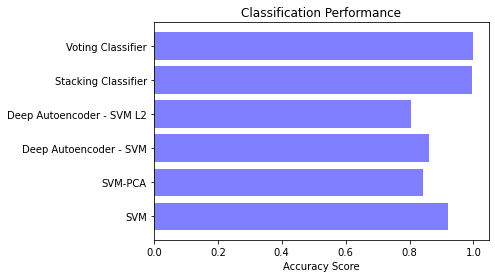

In [99]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

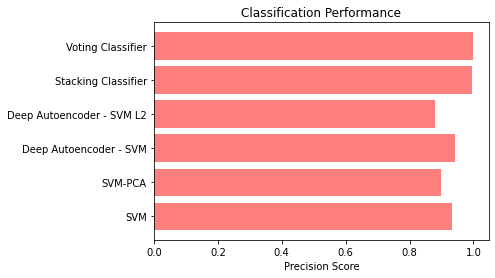

In [100]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

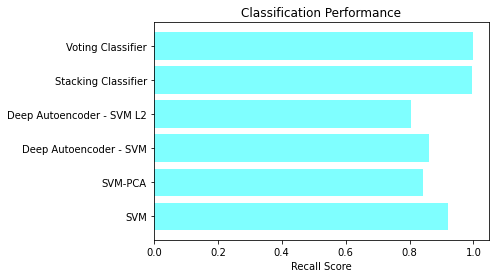

In [101]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='cyan')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 SCore

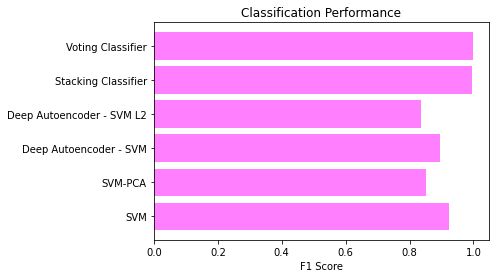

In [102]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='magenta')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()